## Overview
#### The goal of this project is to find a model that results in a high accuracy rate for determining whether tissue is malignant or benign based off the other data it is given. This technology can be used in hospital to help doctors more accurately determine if somone could have a potentially life-threatening health concern. This is considered a supervised model because we know the two possible outcomes the model can result in- malignant or benign. 

## Import Data

In [1]:
import pandas as pd

In [2]:
#Get data set and display it

cancer = pd.read_csv(r'C:\Users\Olivia\Desktop\DATA_601\data\cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Benign to Malignant tissue

cancer.loc[:, 'diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
#Dummy Accuracy Model 
#Ratio of benign to malignant

357/(212 + 357)

0.6274165202108963

In [5]:
#Set y equal to B or M

y = cancer.loc[:, 'diagnosis']

In [6]:
#Display y

y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [7]:
#Set x to all columns except Diagnosis

x = cancer.loc[:, cancer.columns != 'diagnosis']

In [8]:
#Display x

x

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#Instantiate

le = LabelEncoder()

In [11]:
#Fit encoder to y

le.fit(y)

LabelEncoder()

In [12]:
#Transform

le.transform(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [13]:
#B is 0, M is 1

le.classes_

array(['B', 'M'], dtype=object)

## Exploratory Data Analysis 

In [14]:
import matplotlib.pyplot as plt

In [15]:
# Display the count, mean, standard deviation, min and max values, as well as the percentiles of the data

cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0.5, 1.0, 'Distribution of Malignant to Benign Breast Tissue')

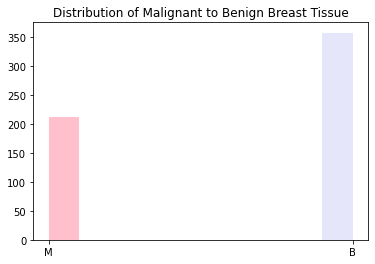

In [16]:
#Display distribution of B to M

N, bins, patches = plt.hist(y)
for i in range(0,5):
    patches[i].set_facecolor('pink')
for i in range(5,10):    
    patches[i].set_facecolor('lavender')
plt.title('Distribution of Malignant to Benign Breast Tissue')

## Data Cleaning / Prep

In [17]:
# No missing values in data set

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25, stratify = y )

In [20]:
import numpy as np

In [21]:
np.unique(y_train, return_counts = True)

(array(['B', 'M'], dtype=object), array([285, 170], dtype=int64))

In [22]:
285/(285 + 170)

0.6263736263736264

In [23]:
np.unique(y_test, return_counts = True)

(array(['B', 'M'], dtype=object), array([72, 42], dtype=int64))

In [24]:
72/(72 + 42)

0.631578947368421

## Scale Data

In [25]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [26]:
std_scaler.fit(x_train) 
x_train_s = std_scaler.transform(x_train) 
x_test_s = std_scaler.transform(x_test)

In [27]:
x_train_s

array([[-0.24079263, -1.34163131,  2.03131604, ..., -1.74392524,
        -0.68289385, -0.78816515],
       [ 0.4148908 ,  1.52940922,  3.11350281, ...,  0.73661188,
        -0.29010801, -0.45826711],
       [-0.24115159, -0.54426208,  0.06970517, ..., -0.09532211,
        -0.36437424, -0.12451383],
       ...,
       [-0.24140512, -0.48176788, -0.8403691 , ...,  0.91368407,
         1.80915075,  2.22497705],
       [-0.24119211, -1.55524786, -1.13508228, ..., -1.74392524,
        -0.48980166, -0.30405767],
       [ 0.43482289, -0.8567331 , -0.62346021, ..., -1.12661496,
        -0.83472703, -0.72537988]])

## Feature Engineering

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly_feats = PolynomialFeatures(degree= 2, interaction_only= True)

In [30]:
poly_feats.fit(x_train_s)

PolynomialFeatures(interaction_only=True)

In [31]:
poly_trained_s = poly_feats.transform(x_train_s)

In [32]:
poly_trained_s.shape

(455, 497)

In [33]:
poly_test_s = poly_feats.transform(x_test_s)

In [34]:
poly_test_s.shape

(114, 497)

## Data Modeling

#### I will be using a logistic regression model to help determine the results.

In [35]:
#Import logistic regression

from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression(penalty = 'none')

In [37]:
#Fit model

lr.fit(x_train_s, y_train)

LogisticRegression(penalty='none')

In [38]:
y_prediction = lr.predict(x_train_s)

In [39]:
#Setting Score

score = lr.score(x_train_s, y_train)

In [40]:
#Accuracy

score

1.0

## Validation

In [41]:
#Validation

from sklearn.model_selection import cross_validate

In [42]:
lr = LogisticRegression(penalty = 'none')

In [43]:
cross_five = cross_validate(estimator= lr, 
                             X = x_train_s,
                             y = y_train,
                             cv = 5,
                             n_jobs= -1, 
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


In [44]:
cross_five['test_score']

array([1.        , 0.94505495, 0.98901099, 0.91208791, 0.95604396])

In [45]:
validation_mean = cross_five['test_score'].mean()
validation_std = cross_five['test_score'].std()

In [46]:
#Print and store results

print('5 fold cross validation results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

5 fold cross validation results (Accuracy) 0.960 =/- 0.032


## Conclusion

#### A Logistic Regression model performs well and results in a high accuracy rate. This model could easily be implemented to help health care workers provide more detailed and accurate diagnosises. A limitation of this would be the size of the data set it would be helpful to have a larger number to help train the model and test the accuracy. 